<a href="https://colab.research.google.com/github/enrique368/otroo/blob/main/My_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
athletes_medals = data[['Name', 'Medal']]
athletes_medals = data[['Name', 'Medal']].dropna(subset=['Medal'])
athletes_medals.head(20)

,Name,Medal
3,Edgar Lindenau Aabye,Gold
37,Arvo Ossian Aaltonen,Bronze
38,Arvo Ossian Aaltonen,Bronze
40,Juhamatti Tapio Aaltonen,Bronze
41,Paavo Johannes Aaltonen,Bronze
42,Paavo Johannes Aaltonen,Gold
44,Paavo Johannes Aaltonen,Gold
48,Paavo Johannes Aaltonen,Gold
50,Paavo Johannes Aaltonen,Bronze
60,Kjetil Andr Aamodt,Gold


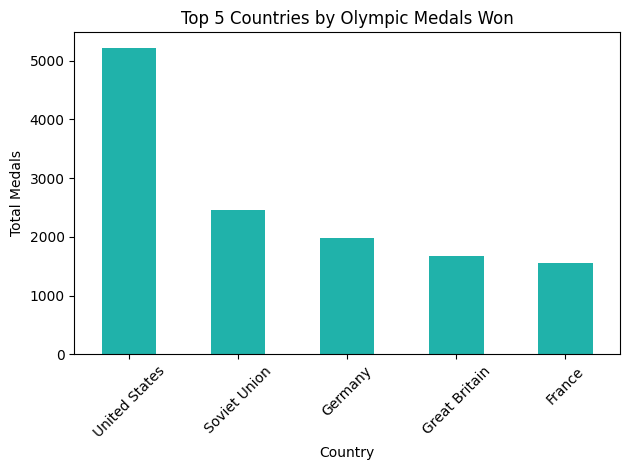

In [ ]:

medal_winners = data.dropna(subset=['Medal'])


country_medal_counts = medal_winners['Team'].value_counts().head(5)

country_medal_counts.plot(kind='bar', color='lightseagreen')
plt.title('Top 5 Countries by Olympic Medals Won')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



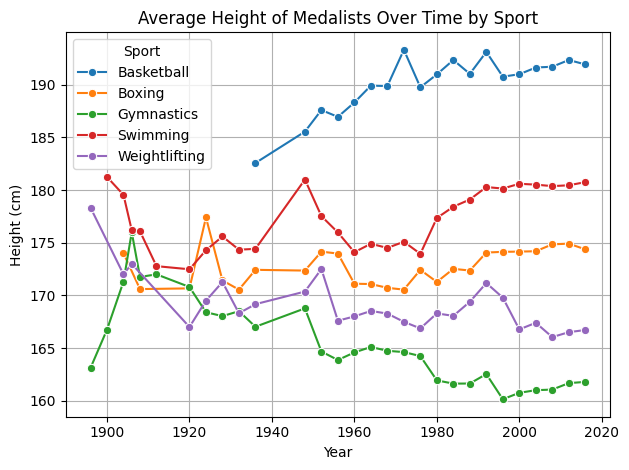

In [ ]:


avg_by_sport = data.groupby(['Sport', 'Year'])[['Height', 'Weight']].mean().reset_index()


selected_sports = ['Basketball', 'Gymnastics', 'Swimming', 'Weightlifting', 'Boxing']
subset = avg_by_sport[avg_by_sport['Sport'].isin(selected_sports)]

sns.lineplot(data=subset, x='Year', y='Height', hue='Sport', marker='o')
plt.title('Average Height of Medalists Over Time by Sport')
plt.ylabel('Height (cm)')
plt.xlabel('Year')
plt.legend(title='Sport')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
modern_data = data[(data['Year'] >= 1956) & (~data['Height'].isna()) & (~data['Medal'].isna())]
selected_sports = ['Basketball', 'Gymnastics', 'Swimming', 'Weightlifting', 'Boxing']
grouped = modern_data[modern_data['Sport'].isin(selected_sports)]
avg_height = grouped.groupby(['Sport', 'Year'])['Height'].mean().reset_index()

avg_height['Height_Change'] = avg_height.groupby('Sport')['Height'].diff()

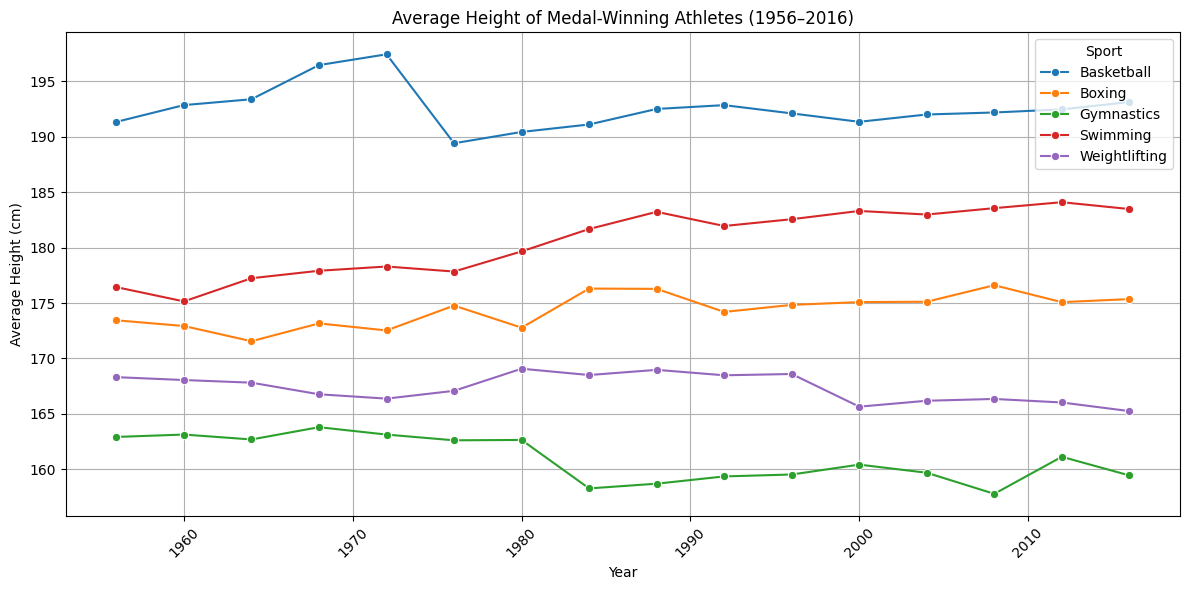

In [ ]:


plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_height, x='Year', y='Height', hue='Sport', marker='o')
plt.title('Average Height of Medal-Winning Athletes (1956–2016)')
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sport')
plt.tight_layout()
plt.show()


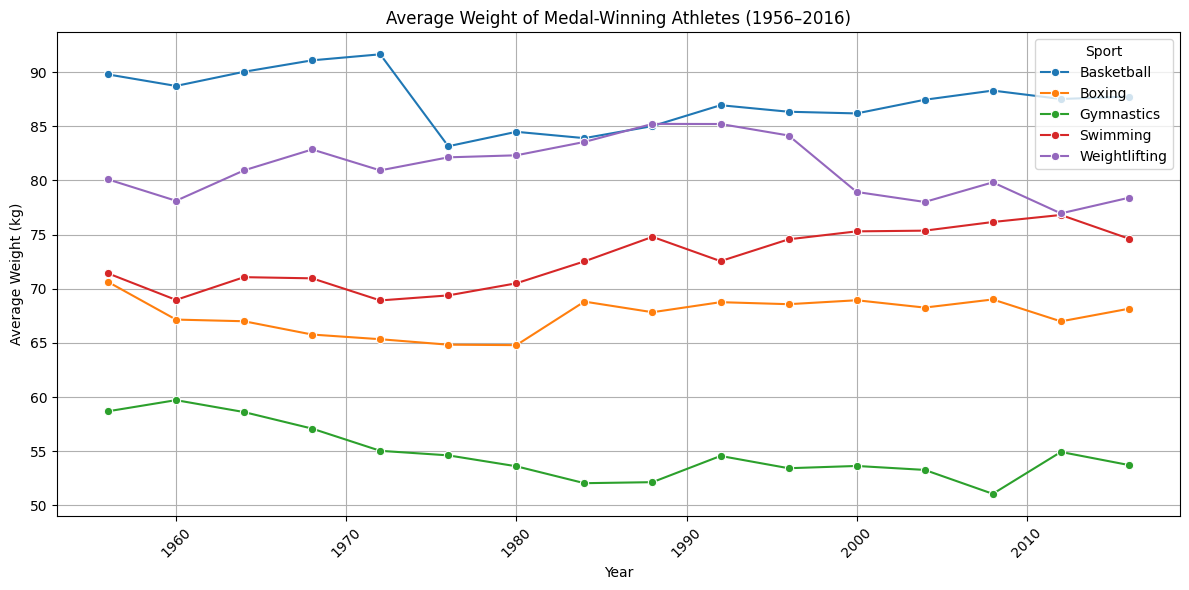

In [ ]:


modern_data = data[(data['Year'] >= 1956) & (~data['Weight'].isna()) & (~data['Medal'].isna())]


selected_sports = ['Basketball', 'Gymnastics', 'Swimming', 'Weightlifting', 'Boxing']

grouped = modern_data[modern_data['Sport'].isin(selected_sports)]
avg_weight = grouped.groupby(['Sport', 'Year'])['Weight'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_weight, x='Year', y='Weight', hue='Sport', marker='o')
plt.title('Average Weight of Medal-Winning Athletes (1956–2016)')
plt.xlabel('Year')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sport')
plt.tight_layout()
plt.show()


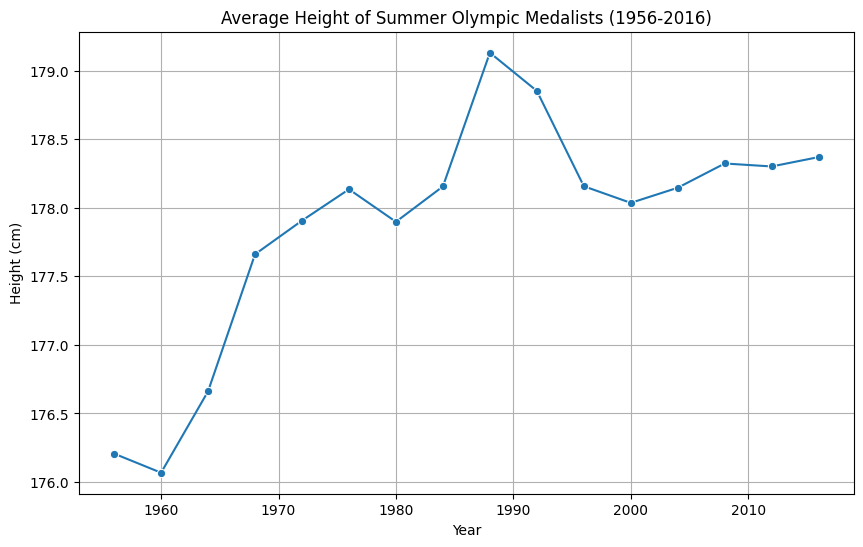

In [ ]:


summer_data = data[
    (data['Season'] == 'Summer') &
    (~data['Medal'].isna()) &
    (~data['Height'].isna()) &
    (data['Year'] >= 1956)
]


avg_height_year = summer_data.groupby('Year')['Height'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_height_year, x='Year', y='Height', marker='o')
plt.title('Average Height of Summer Olympic Medalists (1956-2016)')
plt.xlabel('Year')
plt.ylabel('Height (cm)')
plt.grid(True)
plt.show()


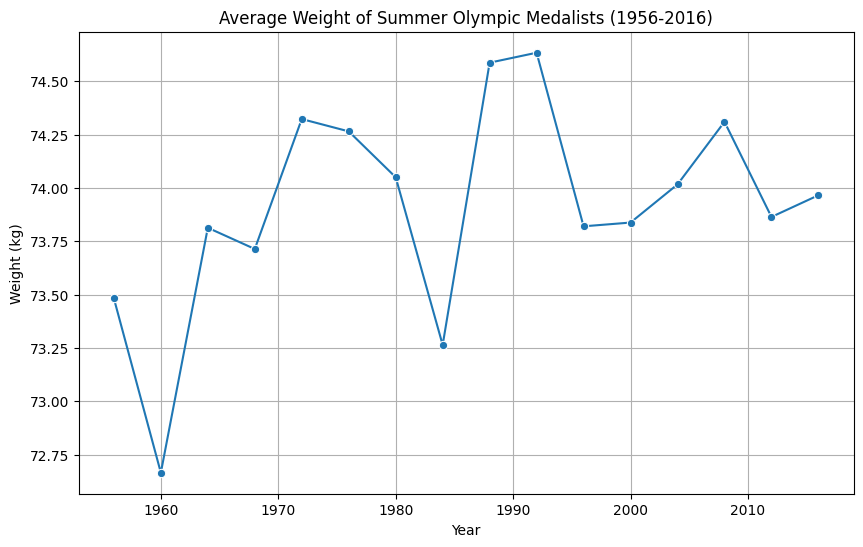

In [ ]:
avg_weight_year = summer_data.groupby('Year')['Weight'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_weight_year, x='Year', y='Weight', marker='o')
plt.title('Average Weight of Summer Olympic Medalists (1956-2016)')
plt.xlabel('Year')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


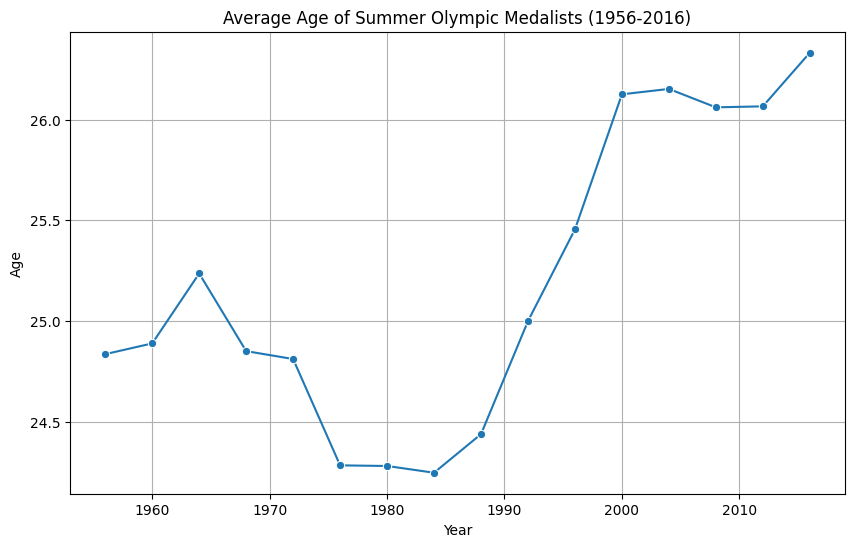

In [ ]:
avg_weight_year = summer_data.groupby('Year')['Age'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_weight_year, x='Year', y='Age', marker='o')
plt.title('Average Age of Summer Olympic Medalists (1956-2016)')
plt.xlabel('Year')
plt.ylabel('Age')
plt.grid(True)
plt.show()